In [29]:
import pandas as pd
import matplotlib.pyplot as plt
from io import StringIO
import numpy as np
from datetime import datetime
import seaborn as sns

In [30]:
df = pd.read_csv('construction_project_status 2.csv')
df.head()

,Project ID,Site Location,Project Status,Material Cost,Labor Hours,Project Progress,Report Date
0,P001,Site A,In Progress,150000.0,2500.0,75%,2024-01-15
1,P002,Site B,Completed,120000.0,1800.0,100%,2023-12-01
2,P003,Site C,Delayed,200000.0,3000.0,50%,2024-01-20
3,P004,Site A,In Progress,160000.0,2600.0,80%,2024-01-20
4,P005,Site D,Completed,110000.0,1700.0,100%,2023-11-15


In [31]:
dfs = df.copy()
dfs.rename(columns={
    'Project ID': 'Project_ID',
    'Site Location': 'Site_Location',
    'Project Status': 'Project_Status',
    'Material Cost': 'Material_Cost',
    'Labor Hours': 'Labor_Hours',
    'Project Progress': 'Project_Progress', 
    'Report Date': 'Report_Date'
}, inplace=True)

In [32]:
#Removing duplicates in IDs and Dates
dfs = dfs.drop_duplicates(subset='Project_ID')
dfs = dfs.drop_duplicates(subset='Report_Date')

In [33]:
#Replacing missing values/NAs in Materia cost and Labor hours with mean values
dfs['Material_Cost'] = dfs['Material_Cost'].fillna(dfs['Material_Cost'].mean())
dfs['Labor_Hours'] = dfs['Labor_Hours'].fillna(dfs['Labor_Hours'].mean())

In [34]:
#Converting to appropriate data type
dfs['Report_Date'] = pd.to_datetime(dfs['Report_Date'])
dfs['Project_Progress_New'] = dfs['Project_Progress'].str.rstrip('%').astype(float)

In [35]:
#Standardized Text Data
dfs['Project_Status'] = dfs['Project_Status'].str.title()

In [36]:
dfs['Project_Status'].unique()

array(['In Progress', 'Completed', 'Delayed'], dtype=object)

In [37]:
#Identify and Address Outliers
dfs[['Material_Cost', 'Labor_Hours', 'Project_Progress_New']].describe().round(2)

,Material_Cost,Labor_Hours,Project_Progress_New
count,98.00,98.00,98.00
mean,195206.19,2863.92,84.62
std,58547.35,795.73,16.84
min,90000.00,1400.00,40.00
25%,145000.00,2112.50,72.75
50%,200000.00,3025.00,90.00
75%,235000.00,3450.00,100.00
max,340000.00,4600.00,100.00


There are no outliers


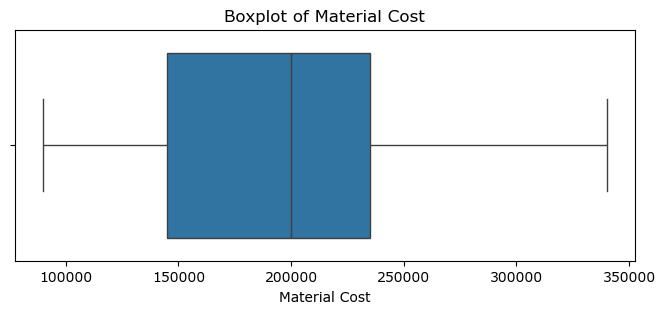

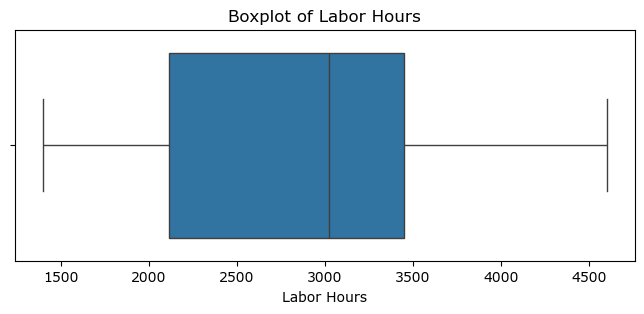

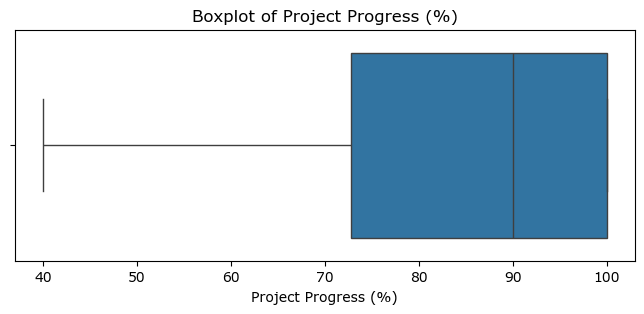

In [38]:
print('There are no outliers')
# Boxplot for Material Cost
plt.figure(figsize=(8, 3))
sns.boxplot(x=dfs['Material_Cost'])
plt.title('Boxplot of Material Cost')
plt.xlabel('Material Cost')
plt.show()

# Boxplot for Labor Hours
plt.figure(figsize=(8, 3))
sns.boxplot(x=dfs['Labor_Hours'])
plt.title('Boxplot of Labor Hours')
plt.xlabel('Labor Hours')
plt.show()

# Boxplot for Project Progress
plt.figure(figsize=(8, 3))
sns.boxplot(x=dfs['Project_Progress_New'])
plt.title('Boxplot of Project Progress (%)')
plt.xlabel('Project Progress (%)')
plt.show()

In [39]:
#Cost Efficiency: Which 'Site Location' has the highest average 'Material Cost' per project, and which has the lowest?
average_mat_cost = dfs.groupby('Site_Location')['Material_Cost'].mean().sort_values(ascending=False).round(2)
max_average_site = average_mat_cost.idxmax()
max_cost = average_mat_cost.max()
min_average_site = average_mat_cost.idxmin()
min_cost = average_mat_cost.min()
average_mat_cost
average_mat_cost_df = average_mat_cost.reset_index()
average_mat_cost_df.columns = ['Site Location', 'Average Material Cost']
average_mat_cost_df

,Site Location,Average Material Cost
0,Site H,285000.00
1,Site E,244615.38
2,Site C,226250.00
3,Site F,212083.33
4,Site A,187307.69
5,Site B,153350.52
6,Site D,132083.33
7,Site G,117500.00


In [40]:
print(f"{max_average_site} has the highest average, spending {max_cost} while {min_average_site} has the lowest average, spending {min_cost}")

Site H has the highest average, spending 285000.0 while Site G has the lowest average, spending 117500.0


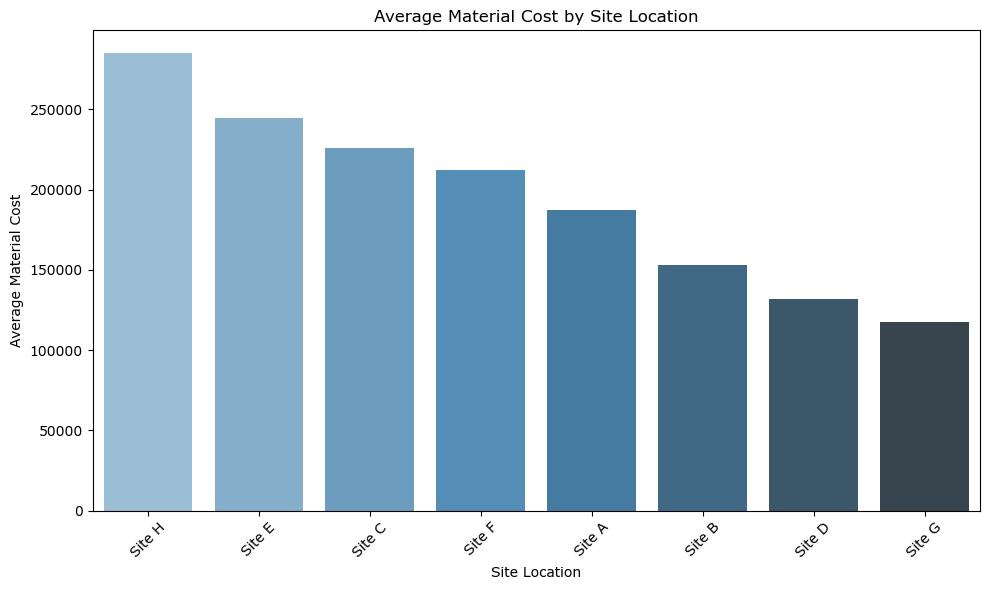

In [41]:
plt.figure(figsize=(10, 6))
sns.barplot(data=average_mat_cost_df, x='Site Location', y='Average Material Cost', hue='Site Location', palette='Blues_d', legend=False)

plt.title('Average Material Cost by Site Location')
plt.xlabel('Site Location')
plt.ylabel('Average Material Cost')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [42]:
#Labor Utilization: Is there a correlation between 'Labor Hours' and 'Project Progress'
labour_project_corr = dfs['Labor_Hours'].corr(dfs['Project_Progress_New'])
print(f"{labour_project_corr:.2f}")
print('There is a negative correlation. as Labor Hours increase, Project Progress tends to decrease slightly')

-0.36
There is a negative correlation. as Labor Hours increase, Project Progress tends to decrease slightly


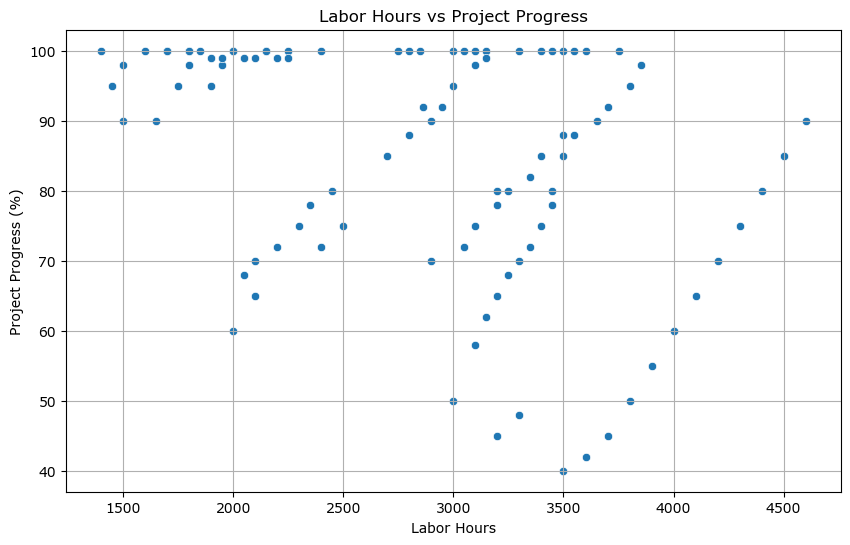

In [43]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Labor_Hours', y='Project_Progress_New', data=dfs)
plt.title('Labor Hours vs Project Progress')
plt.xlabel('Labor Hours')
plt.ylabel('Project Progress (%)')
plt.grid(True)
plt.show()

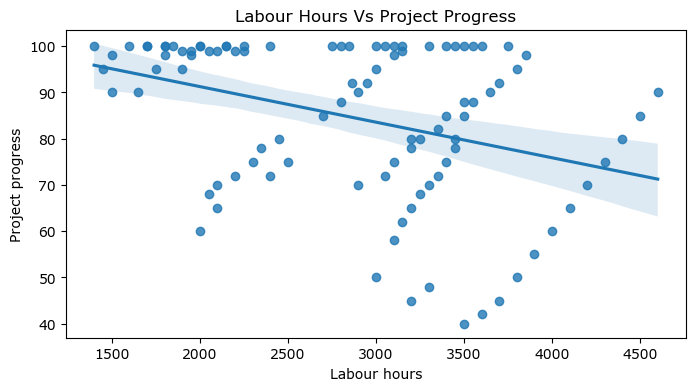

In [44]:
plt.figure(figsize=(8,4))
sns.regplot(x='Labor_Hours', y='Project_Progress_New', data=dfs)
plt.title('Labour Hours Vs Project Progress')
plt.xlabel('Labour hours')
plt.ylabel('Project progress')
plt.show()

In [45]:
dfs.head()

,Project_ID,Site_Location,Project_Status,Material_Cost,Labor_Hours,Project_Progress,Report_Date,Project_Progress_New
0,P001,Site A,In Progress,150000.0,2500.0,75%,2024-01-15,75.0
1,P002,Site B,Completed,120000.0,1800.0,100%,2023-12-01,100.0
2,P003,Site C,Delayed,200000.0,3000.0,50%,2024-01-20,50.0
4,P005,Site D,Completed,110000.0,1700.0,100%,2023-11-15,100.0
6,P006,Site B,In Progress,130000.0,2000.0,60%,2024-02-01,60.0


In [46]:
#Provide a count of projects in each 'Project Status' (e.g., "Completed", "In Progress", "Delayed").
status_group = dfs.groupby('Project_Status').size().reset_index(name='Count')
status_group

,Project_Status,Count
0,Completed,27
1,Delayed,11
2,In Progress,60


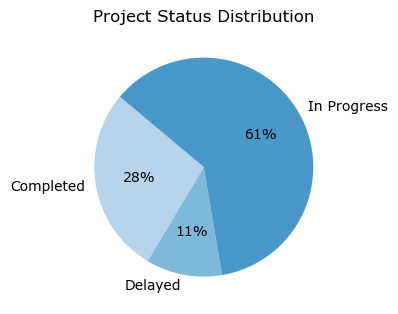

In [47]:
pie_colors = plt.cm.Blues(np.linspace(0.3, 0.6, len(status_group)))

plt.figure(figsize=(4, 4))
plt.pie(
    status_group['Count'],
    labels=status_group['Project_Status'],
    autopct='%1.0f%%',
    startangle=140,
    colors=pie_colors
)

plt.title('Project Status Distribution')
plt.tight_layout()
plt.show()

In [48]:
#Monthly Trends: What are the total 'Material Cost' and 'Labor Hours' incurred each month, based on the 'Report Date'?
dfs['Report_Month'] = dfs['Report_Date'].dt.to_period('M')
trend = dfs.groupby('Report_Month')[['Material_Cost', 'Labor_Hours']].sum().round(2)
trend

,Material_Cost,Labor_Hours
Report_Month,,
2023-11,110000.00,1700.00
2023-12,120000.00,1800.00
2024-01,630000.00,9700.00
2024-02,830000.00,12500.00
2024-03,1275206.19,20063.92
2024-04,1280000.00,19400.00
2024-05,1300000.00,19500.00
2024-06,1275000.00,18950.00
2024-07,1275000.00,18950.00


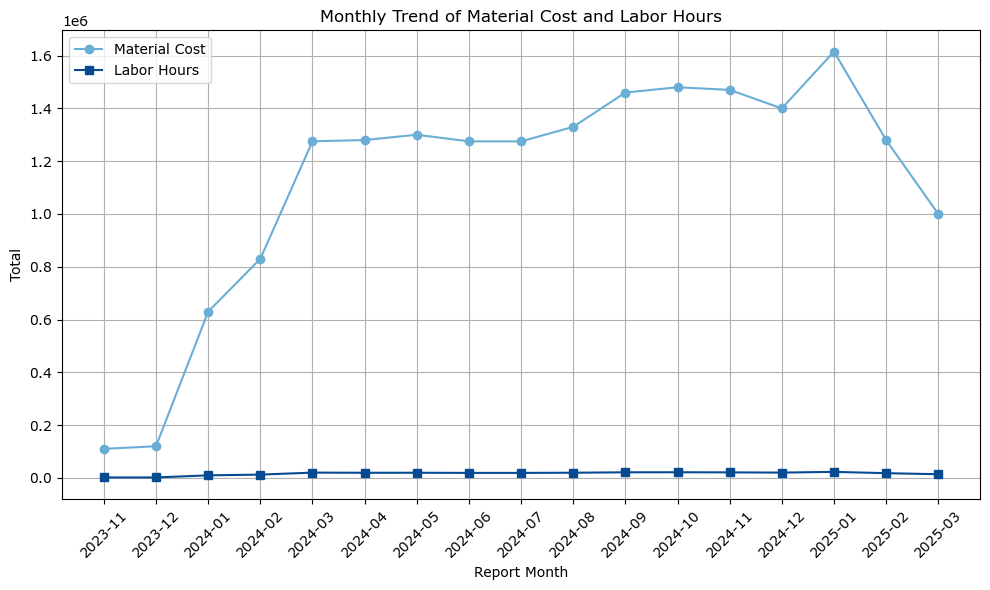

In [49]:
line_colors = plt.cm.Blues(np.linspace(0.5, 0.9, 2))

plt.figure(figsize=(10, 6))
plt.plot(trend.index.astype(str), trend['Material_Cost'], label='Material Cost', marker='o', color=line_colors[0])
plt.plot(trend.index.astype(str), trend['Labor_Hours'], label='Labor Hours', marker='s', color=line_colors[1])

plt.title('Monthly Trend of Material Cost and Labor Hours')
plt.xlabel('Report Month')
plt.ylabel('Total')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [50]:
#Top 5 and Bottom 5 Projects: Based on a combined metric of 'Material Cost' and 'Labor Hours'
avg_labor_hour = dfs['Labor_Hours'].mean().round(2)
avg_material_cost = dfs['Material_Cost'].mean().round(2)
avg_labor_rate = (avg_material_cost/avg_labor_hour).round(2)
dfs['Total_Cost'] = (dfs['Material_Cost'] + dfs['Labor_Hours']) * avg_labor_rate
top_5 = dfs.nlargest(5, 'Total_Cost')
bottom_5 = dfs.nsmallest(5, 'Total_Cost')

In [51]:
insights = pd.DataFrame({
    'Metric': [
        'Site with Highest Avg Material Cost',
        'Highest Avg Material Cost',
        'Site with Lowest Avg Material Cost',
        'Lowest Avg Material Cost',
        'Labor Hours vs Project Progress (Correlation)'
    ],
    'Value': [
        max_average_site,
        max_cost,
        min_average_site,
        min_cost,
        labour_project_corr
    ]
})

In [52]:
# === Export to Excel ===
with pd.ExcelWriter('cleaned_construction_data.xlsx', engine='xlsxwriter') as writer:
    dfs.to_excel(writer, sheet_name='Cleaned_Data', index=False)
    insights.to_excel(writer, sheet_name='Analysis_Insights', index=False)
    
    # Export trend and project status on same sheet for clarity
    trend.to_excel(writer, sheet_name='Analysis_Insights', startrow=len(insights)+3)
    status_group.to_excel(writer, sheet_name='Analysis_Insights', startrow=len(insights)+len(trend)+6)
    
    # Export top & bottom projects
    top_5.to_excel(writer, sheet_name='Top_Bottom_Projects', index=False, startrow=0)
    bottom_5.to_excel(writer, sheet_name='Top_Bottom_Projects', index=False, startrow=top_5.shape[0] + 3)